# Images and convolutional networks

In this notebook, we'll cover the use of convolutional neural networks for image classification.

## Preamble: GPUs

Since these networks widely benefit from computations on GPU, you could be curious about whether GPUs will be used for the computations at stake in this notebook.

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

GPU device not found


If you are using Google Colab and no GPU is found, enable GPUs for the notebook as follows:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

and restart the notebook.

By default, all operations in `keras` are run on GPU if a GPU is found.
If no GPU is available, the code runs on CPU without requiring any adaptation.

## LeNet and variants (shallow CNNs)

You will first experiments with rather shallow networks to get used to typical layers used in CNNs.


**Question 1.** Import the MNIST dataset and make sure it has the correct shape to feed a CNN (i.e. the dataset should 
have dimensions $(n, w, h, c)$ where $n$ is the number of images in the set, $w$ and $h$ are the width and height of an 
image and $c$ its number of channels: 1 for black & white images and 3 for RGB ones).

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.
    x_test = x_test / 255.
    x_train = x_train.reshape((-1, 28, 28, 1))
    x_test = x_test.reshape((-1, 28, 28, 1))
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = prepare_mnist()

To define a CNN, you will need (at least) the following layers:
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
* [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

**Question 2.** Implement a CNN with a single convolutional layer followed by a max-pooling and a fully-connected layer. Show the number of parameters of these networks and evaluate its performance on MNIST data.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=5),
    Flatten(),
    Dense(units=10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
300/300 - 9s - loss: 1.0827 - accuracy: 0.7117 - val_loss: 0.4579 - val_accuracy: 0.8817
Epoch 2/10
300/300 - 6s - loss: 0.3622 - accuracy: 0.8992 - val_loss: 0.2754 - val_accuracy: 0.9263
Epoch 3/10
300/300 - 5s - loss: 0.2515 - accuracy: 0.9288 - val_loss: 0.2083 - val_accuracy: 0.9426
Epoch 4/10
300/300 - 5s - loss: 0.2025 - accuracy: 0.9428 - val_loss: 0.1712 - val_accuracy: 0.9510
Epoch 5/10
300/300 - 5s - loss: 0.1737 - accuracy: 0.9498 - val_loss: 0.1500 - val_accuracy: 0.9543
Epoch 6/10
300/300 - 5s - loss: 0.1543 - accuracy: 0.9551 - val_loss: 0.1362 - val_accuracy: 0.9581
Epoch 7/10
300/300 - 5s - loss: 0.1409 - accuracy: 0.9581 - val_loss: 0.1231 - val_accuracy: 0.9626
Epoch 8/10
300/300 - 5s - loss: 0.1302 - accuracy: 0.9614 - val_loss: 0.1134 - val_accuracy: 0.9656
Epoch 9/10
300/300 - 5s - loss: 0.1222 - accuracy: 0.9635 - val_loss: 0.1087 - val_accuracy: 0.9664
Epoch 10/10
300/300 - 5s - loss: 0.1153 - accuracy: 0.9653 - val_loss: 0.1003 - val_accuracy: 0.9698

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (200, 26, 26, 10)         100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (200, 5, 5, 10)           0         
_________________________________________________________________
flatten (Flatten)            (200, 250)                0         
_________________________________________________________________
dense (Dense)                (200, 10)                 2510      
Total params: 2,610
Trainable params: 2,610
Non-trainable params: 0
_________________________________________________________________


**Question 3.** Implement the following network (leNet):

![leNet model](https://github.com/rtavenar/deep-notebooks/raw/main/assets/convnet_fig.svg)

Compare its performance to that of a fully connected model with the same number of parameters.

In [5]:
model = Sequential([
    Conv2D(filters=6, kernel_size=5, padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=16, kernel_size=5, padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=120, activation="relu"),
    Dense(units=84, activation="relu"),
    Dense(units=10, activation="softmax"),
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
300/300 - 13s - loss: 0.3933 - accuracy: 0.8847 - val_loss: 0.1147 - val_accuracy: 0.9647
Epoch 2/10
300/300 - 11s - loss: 0.1063 - accuracy: 0.9676 - val_loss: 0.0871 - val_accuracy: 0.9723
Epoch 3/10
300/300 - 12s - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0639 - val_accuracy: 0.9781
Epoch 4/10
300/300 - 11s - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0543 - val_accuracy: 0.9821
Epoch 5/10
300/300 - 12s - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0410 - val_accuracy: 0.9860
Epoch 6/10
300/300 - 11s - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0435 - val_accuracy: 0.9866
Epoch 7/10
300/300 - 11s - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0384 - val_accuracy: 0.9859
Epoch 8/10
300/300 - 11s - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 9/10
300/300 - 11s - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 10/10
300/300 - 11s - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0445 - val_accura

## Image classification with ResNet models

A very efficient way to perform real-world image classification is to rely on a pretrained model.
`keras` provides models trained on ImageNet.
In this section, you will use `ResNet50` to classify images you will provide.

**Question 4.** Adapt the following code (that comes from [`keras` docs](https://keras.io/applications/#usage-examples-for-image-classification-models)) to classify a kangaroo image that you will first upload in the notebook files.

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'kangaroo.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x_input = preprocess_input(x)

preds = model.predict(x_input)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01877812', 'wallaby', 0.9021192), ('n02423022', 'gazelle', 0.045051575), ('n02417914', 'ibex', 0.015986579)]


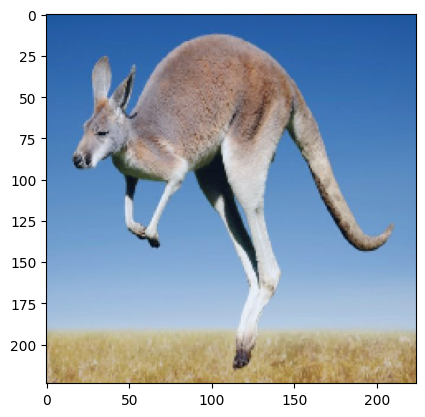

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow((x[0] - x.min()) / (x.max() - x.min()));

## Fine-tuning a model to your data

Very often, however, your image classification problem will not match ImageNet classes.
In such cases, a typical strategy consists in fine-tuning an existing model to your problem.
This is done by learning only the fully connected layers at the ouput of the model and keep other layers freezed.

When loading weights from a pretrained model, `keras` offers an option to remove the classification layers and freeze weights of the convolutional layers:

```python
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
for layer in base_model.layers:
  layer.trainable = False
```

Note that here, we provide the image shape when re-building the `ResNet50` model so that, if that shape is not the one of ImageNet images, `keras` will still be able to compute all tensor shapes in the network automatically.

From that point, `base_model` can be used in a `Sequential` model as if it were a single layer, which makes it feasible to plug new layers at the output of the `ResNet50` convolutions.

### The dataset

In this notebook, you will work with a new dataset that cannot be loaded via `keras.datasets` module.
Depending in the platform on which you run this notebook, you will have to follow different guidelines to prepare the required files for the following steps.

<details><summary>If you use Google Colab...</summary>

The images should be [stored](https://drive.google.com/drive/folders/1_hs6-moToZkCgiub7eXyJmAm7zVT2tNo?usp=sharing) on your Google Drive account, in a subfolder named `./cats_and_dogs/`.

Once this done, copy/paste the following code in the code block below to set the path to the data:

```python
from google.colab import drive
drive.mount('/content/drive')
folder_data = '/content/drive/My Drive/cats_and_dogs/'
```
</details>

<details><summary>If you use your own computer</summary>

The images should be [downloaded and stored](https://drive.google.com/drive/folders/1_hs6-moToZkCgiub7eXyJmAm7zVT2tNo?usp=sharing) in a subfolder of your working directory named `./cats_and_dogs/`.

Once this done, copy/paste the following code in the code block below to set the path to the data:

```python
folder_data = './cats_and_dogs/'
```
</details>

In [8]:
folder_data = './cats_and_dogs/'

Now, whatever your platform, run the cell below:

In [9]:
!ls {folder_data}

test_catdog  train_catdog


The last line of the output above should be:
```
test_catdog  train_catdog
```

Then the data should be loaded using the following functions:

In [10]:
import os

def load_cats_and_dogs_folder(path, target_size=None, verbose=True):
    X = []
    y = []
    i = 0
    for fname in os.listdir(path):
        if 'cat' in fname:
            X.append(
                np.array(image.load_img(path+fname, target_size=target_size))
            )
            y.append(0)
        elif 'dog' in fname:
            X.append(
                np.array(image.load_img(path+fname, target_size=target_size))
            )
            y.append(1)
        i+=1
        if verbose and i % 50 == 0:
            print('{0:.2f} % loaded'.format(100*(i/len(os.listdir(path)))))
    return np.array(X), np.array(y)

def load_preprocessed_cats_and_dogs(base_folder, target_size=None, 
                                    verbose=True):
    if verbose:
        print("Loading training set")
    X_train, y_train = load_cats_and_dogs_folder(base_folder + "/train_catdog/", 
                                                 target_size=target_size,
                                                 verbose=verbose)
    X_train = preprocess_input(X_train)

    if verbose:
        print("Loading test set")
    X_test, y_test = load_cats_and_dogs_folder(base_folder + "/test_catdog/", 
                                               target_size=target_size,
                                               verbose=verbose)
    X_test = preprocess_input(X_test)

    return X_train, X_test, y_train, y_test

# The call is here:
X_train, X_test, y_train, y_test = load_preprocessed_cats_and_dogs(folder_data, target_size=(200, 200))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

Loading training set
9.96 % loaded
19.92 % loaded
29.88 % loaded
39.84 % loaded
49.80 % loaded
59.76 % loaded
69.72 % loaded
79.68 % loaded
89.64 % loaded
99.60 % loaded
Loading test set
10.00 % loaded
20.00 % loaded
30.00 % loaded
40.00 % loaded
50.00 % loaded
60.00 % loaded
70.00 % loaded
80.00 % loaded
90.00 % loaded
100.00 % loaded
(502, 200, 200, 3) (502,) (500, 200, 200, 3) (500,)


### The model

**Question 5.** Now you will:

1. use convolution layers from a pre-trained `ResNet50` model and freeze them;
2. plug an additional logistic regression layer;
3. compile the full model;
4. observe the performance of such a model on your Cat vs Dog problem.

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
for layer in base_model.layers:
  layer.trainable = False

model = Sequential([
      base_model,
      Flatten(),
      Dense(units=1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=100)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94773248/94765736 [==============================] - 8s 0us/step
Epoch 1/3
6/6 [==============================] - 73s 12s/step - loss: 3.4301 - accuracy: 0.6222 - val_loss: 1.0944 - val_accuracy: 0.8760
Epoch 2/3
6/6 [==============================] - 68s 12s/step - loss: 0.3028 - accuracy: 0.9367 - val_loss: 0.3300 - val_accuracy: 0.9640
Epoch 3/3
6/6 [==============================] - 67s 12s/step - loss: 0.3069 - accuracy: 0.9684 - val_loss: 0.2544 - val_accuracy: 0.9780


In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 100353    
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


**Question 6.** Starting from the model you got at the previous stage, fine-tune _all_ the weights in this model
(even the convolution ones) using a learning rate of .00001 (1e-5). See if this improves on performance.

In [13]:
from tensorflow.keras.optimizers import Adam

for layer in base_model.layers:
  layer.trainable = True
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=100)

Epoch 1/3
6/6 [==============================] - 188s 29s/step - loss: 0.1838 - accuracy: 0.9736 - val_loss: 0.2452 - val_accuracy: 0.9740
Epoch 2/3
6/6 [==============================] - 189s 31s/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.2317 - val_accuracy: 0.9780
Epoch 3/3
6/6 [==============================] - 180s 29s/step - loss: 1.3738e-04 - accuracy: 1.0000 - val_loss: 0.2316 - val_accuracy: 0.9820
